Name: David L. Parks  
Prepared: Fall 2019

### Sentiment Analysis of Restaurant Reviews from TripAdvisor

This report uses sentiment analysis to determine if there is a relationship between the length of a review and its positiveness or negativeness. The report also examines the consumption of alcohol to determine if it influences reviews. The data were scraped using python from restaurants in Roanoke, VA on TripAdvisor[[1]](https://www.tripadvisor.com/Restaurants-g58134-Roanoke_Virginia.html). The collection of reviews was limited to the ten most recent reviews and may not reflect the entirety of opinions. In this simple analysis, the context of words like 'great' may be misclassified according to the word lists. For example, if a reviewer wrote something similar to "the waiter made the greatest mistake," the word 'greatest' may count toward the positive word count.

#### 1) Data Setup

The data set contains 1487 reviews from 147 restaurants in Roanoke, VA. Positive and negative word lists were retrieved from Stanford University's Natural Language Processing Group (provided by Dr. North). A short word list for common words associated with alcohol was assembled from various Google searches.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from string import punctuation
plt.style.use('fivethirtyeight')

In [2]:
# import data
reviews = pd.read_csv('Homework08.csv', index_col='Date', parse_dates=True)

# import list of positive words
with open('positive.txt') as file:
    positive_words = set(file.read().split())

# import list of negative words
with open('negative.txt') as file:
    negative_words = set(file.read().split())
    
# import list of words associated with alcohol
with open('alcohol.txt') as file:
    alcohol_words = set(file.read().split())

In [3]:
# show number of observations and factors
print(reviews.shape)
reviews.head()

(1487, 5)


,Restaurant,Rating,Author,Review,URL
Date,,,,,
2019-09-21,Rockfish Food & Wine,2.0,gringamex,I had long wanted to try the Rockfish and I ha...,https://www.tripadvisor.com/ShowUserReviews-g5...
2019-09-03,Rockfish Food & Wine,4.0,mrsirin,This spacious place has a varied menu offering...,https://www.tripadvisor.com/ShowUserReviews-g5...
2019-08-22,Rockfish Food & Wine,5.0,dolceniente,What a wonderful surprise! We had dinner in th...,https://www.tripadvisor.com/ShowUserReviews-g5...
2019-08-12,Rockfish Food & Wine,5.0,Gary W,Really enjoyed our Sunday Dinner at Rockfish! ...,https://www.tripadvisor.com/ShowUserReviews-g5...
2019-05-30,Rockfish Food & Wine,5.0,veracity55,Just had our first meal at Rockfish. The hoste...,https://www.tripadvisor.com/ShowUserReviews-g5...


#### 2) Construct Additional Factors

To analyze the data, each initial review string was transformed into a bag of words. Columns for the day of the week, the bag of words, the number of words in each review, the percentage of positive and negative words in each review, overall labels for either positive or negative, and mentions of alcohol were added to the original dataframe.

In [4]:
# drop URL column
reviews.drop(columns=['URL'], inplace=True)

# add day of the week
reviews['Day'] = reviews.index.strftime('%A')

# create a bag of words for each review
reviews['Bag_of_Words'] = reviews.Review.map(lambda text: text.split())
reviews['Bag_of_Words'] = reviews.Bag_of_Words.map(lambda bag: [word.strip(punctuation).lower() for word in bag])

# compute the length of each review
reviews['Length_of_Review'] = reviews.Bag_of_Words.map(len)

# compute the positive and negative percentage of words in each review 
reviews['Percent_Positive'] = reviews.Bag_of_Words.map(lambda bag: len([word for word in bag if word in positive_words])) / reviews.Length_of_Review
reviews['Percent_Negative'] = reviews.Bag_of_Words.map(lambda bag: len([word for word in bag if word in negative_words])) / reviews.Length_of_Review

In [5]:
# label each review as positive or negative
def sentiment_label(pos_Series, neg_Series):
    result = []
    for i in range(len(pos_Series)):
        if pos_Series.iloc[i] > neg_Series.iloc[i]:
            result.append('Positive')
        elif pos_Series.iloc[i] < neg_Series.iloc[i]:
            result.append('Negative')
        else:
            result.append('Neutral')
    return result

reviews['Sentiment'] = sentiment_label(reviews.Percent_Positive, reviews.Percent_Negative)

In [6]:
# indicate if the review referenced alcohol
reviews['Alcohol'] = reviews.Bag_of_Words.map(lambda bag: 'Yes' if ([word for word in bag if word in negative_words]) else 'No')

In [7]:
# show augmented table
reviews.head()

,Restaurant,Rating,Author,Review,Day,Bag_of_Words,Length_of_Review,Percent_Positive,Percent_Negative,Sentiment,Alcohol
Date,,,,,,,,,,,
2019-09-21,Rockfish Food & Wine,2.0,gringamex,I had long wanted to try the Rockfish and I ha...,Saturday,"[i, had, long, wanted, to, try, the, rockfish,...",142,0.028169,0.035211,Negative,Yes
2019-09-03,Rockfish Food & Wine,4.0,mrsirin,This spacious place has a varied menu offering...,Tuesday,"[this, spacious, place, has, a, varied, menu, ...",21,0.142857,0.000000,Positive,No
2019-08-22,Rockfish Food & Wine,5.0,dolceniente,What a wonderful surprise! We had dinner in th...,Thursday,"[what, a, wonderful, surprise, we, had, dinner...",97,0.185567,0.030928,Positive,Yes
2019-08-12,Rockfish Food & Wine,5.0,Gary W,Really enjoyed our Sunday Dinner at Rockfish! ...,Monday,"[really, enjoyed, our, sunday, dinner, at, roc...",96,0.093750,0.000000,Positive,No
2019-05-30,Rockfish Food & Wine,5.0,veracity55,Just had our first meal at Rockfish. The hoste...,Thursday,"[just, had, our, first, meal, at, rockfish, th...",191,0.073298,0.015707,Positive,Yes


#### 3) Data Analysis

This histogram shows the overall distribution of ratings where the majority of restaurants in this data set received either 4 or 5 stars. Given that fewer than 10% of new restaurants remain open longer than a year, the leftward skew seems reasonable.

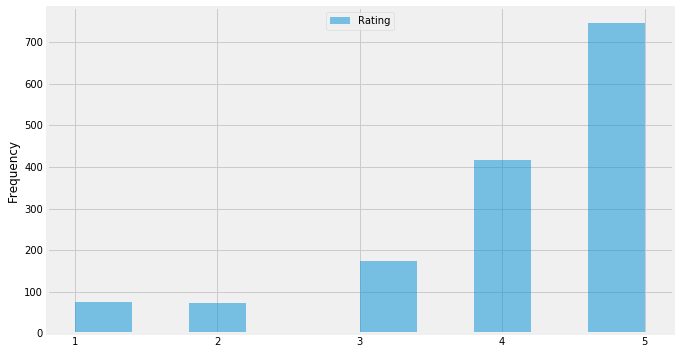

In [8]:
# general distribution of ratings
hist = reviews[['Rating']].plot.hist(alpha=0.5, figsize=(10, 6))
plt.xticks([1,2,3,4,5])
plt.legend(loc='upper center');

The strip plots below visualize the relationship between a restaurant's star rating and the positive or negative sentiment of each review. A linear regression line was added to each plot to clarify the direction of the relationship. Each point was colored according to the absense/presence of words associated with alcohol in the review.

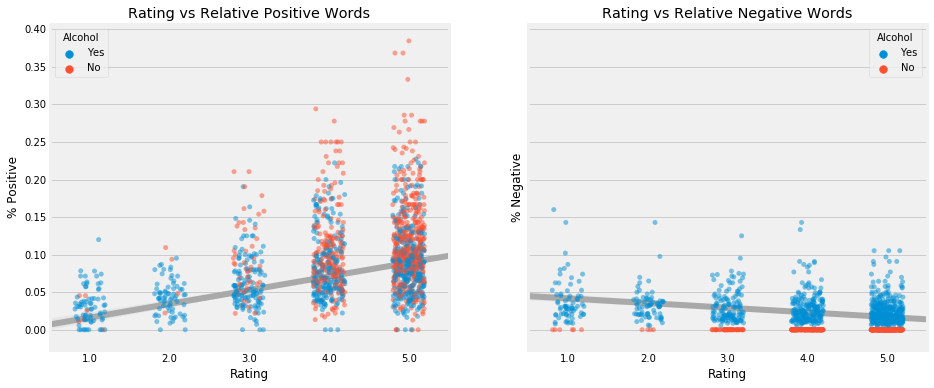

In [9]:
# plot rating versus percent positive and negative words
# set up subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# axis 0
sns.stripplot(reviews.Rating, reviews.Percent_Positive, alpha=0.5, ax=ax[0], jitter=0.2, hue=reviews.Alcohol)
sns.regplot(reviews.Rating, reviews.Percent_Positive, ax=ax[0], color='darkgray', scatter=False)

# axis 1
sns.stripplot(reviews.Rating, reviews.Percent_Negative, alpha=0.5, ax=ax[1], jitter=0.2, hue=reviews.Alcohol)
sns.regplot(reviews.Rating, reviews.Percent_Negative, ax=ax[1], color='darkgray', scatter=False)

# set titles
ax[0].set_title('Rating vs Relative Positive Words')
ax[1].set_title('Rating vs Relative Negative Words')

# set ylabels
ax[0].set_ylabel('% Positive')
ax[1].set_ylabel('% Negative')

# display legend
ax[0].legend(title='Alcohol')
ax[1].legend(title='Alcohol');

Interestingly, the percentage of positive words increases as mentions of alcohol decrease. It should also be noted that all of the reviews with negative words also mention alcohol. The red points across the bottom of the righthand graph indicate that a number of reviews did not have any negative words. This may affect the slope of the regression line on that side.

The next pair of graphs show the relationship between the number of words in a review and its positive or negative sentiment.

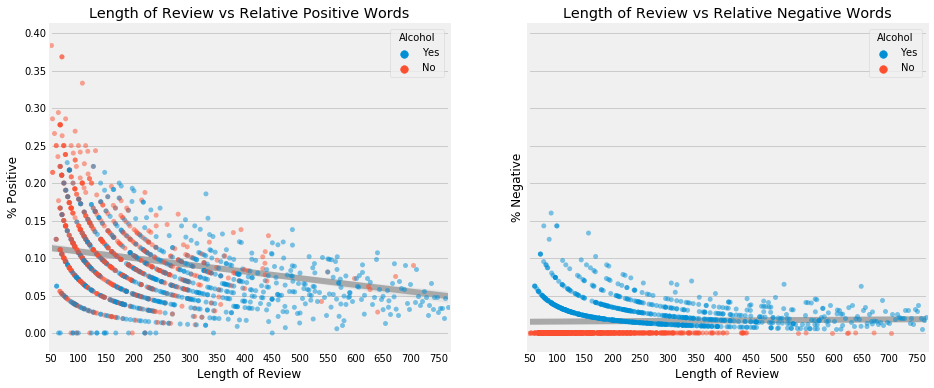

In [10]:
# plot length of review versus percent positive and negative words
# set up subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# axis 0
sns.stripplot(reviews.Length_of_Review, reviews.Percent_Positive, alpha=0.5, ax=ax[0], jitter=0.2,
              hue=reviews.Alcohol)
sns.regplot(reviews.Length_of_Review, reviews.Percent_Positive, ax=ax[0], color='darkgray', scatter=False)

# axis 1
sns.stripplot(reviews.Length_of_Review, reviews.Percent_Negative, alpha=0.5, ax=ax[1], jitter=0.2,
              hue=reviews.Alcohol)
sns.regplot(reviews.Length_of_Review, reviews.Percent_Negative, ax=ax[1], color='darkgray', scatter=False)

# set number of xticks, xticklables, xlabels, and legend titles
for axis in ax.flat:
    axis.xaxis.set_major_locator(plt.MaxNLocator(17))
    axis.set_xticklabels(np.linspace(0, 800, 17, dtype=int))
    axis.set_xlabel('Length of Review')
    axis.legend(title='Alcohol')

# set titles
ax[0].set_title('Length of Review vs Relative Positive Words')
ax[1].set_title('Length of Review vs Relative Negative Words')    

# set ylabels
ax[0].set_ylabel('% Positive')
ax[1].set_ylabel('% Negative');

The graphs above indicate that as the length of a review grows the content tends to become more neutral. This may be due to the use of articles and conjunctions to build sentences as opposed to a decline in sentiment.

The final graph visualizes the relationship between day of the week and whether a review was labeled positive or negative.

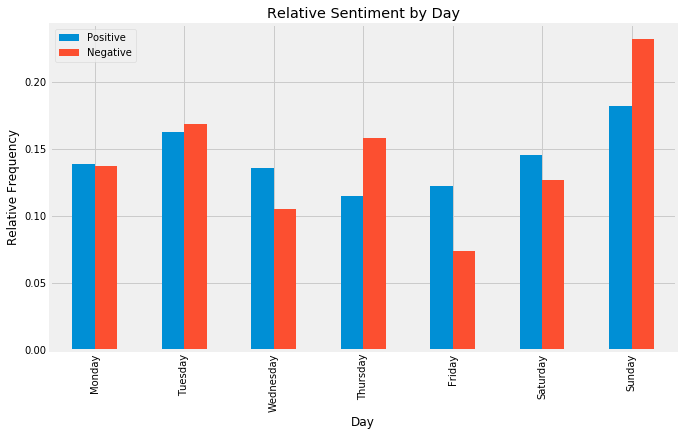

In [11]:
# plot relative sentiment by day
# create ordered day of week index
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# get absolute sentiment counts for positive and negative reviews
positive_counts = reviews[reviews.Sentiment == 'Positive'].groupby('Day')[['Sentiment']].count()
negative_counts = reviews[reviews.Sentiment == 'Negative'].groupby('Day')[['Sentiment']].count()

# join the two dataframes, rename columns, and create a relative count
counts = positive_counts.join(negative_counts, rsuffix='neg')
counts.columns = ['Positive', 'Negative']
counts = counts / counts.sum()

# plot
counts.reindex(day_order).plot.bar(figsize=(10, 6))
plt.ylabel('Relative Frequency')
plt.title('Relative Sentiment by Day');

The graph shows that more negative reviews are written on Tuesday, Thursday, and Sunday. Restaurants interested in improving their rating should focus on improving customer service on these days.

#### 4) Conclusion

Overall, the data for restaurants in Roanoke, VA show that as the length of a review grows, its sentiment-either positive or negative-declines. There also seems to be an interesting relationship between alcohol and sentiment that warrants further research.